# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(f"{url}appid={weather_api_key}&units={units}&q={city}")

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp =  city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | sitka
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | constitucion
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | zhanaozen
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | eusebio ayala
Processing Record 11 of Set 1 | cherskiy
Processing Record 12 of Set 1 | malpe
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | shibarghan
City not found. Skipping...
Processing Record 16 of Set 1 | nemuro
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 19 of Set 1 | teguldet
Processing Record 20 of Set 1 | egvekinot
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | 

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,esso,55.9333,158.7000,-3.97,98,92,2.39,RU,1680365262
1,sao felix do xingu,-6.6447,-51.9950,24.65,93,99,1.58,BR,1680365262
2,narsaq,60.9167,-46.0500,0.12,59,92,0.99,GL,1680365030
3,mount gambier,-37.8333,140.7667,8.66,84,17,0.77,AU,1680365262
4,cape town,-33.9258,18.4232,21.23,72,0,7.20,ZA,1680364724


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esso,55.9333,158.7000,-3.97,98,92,2.39,RU,1680365262
1,sao felix do xingu,-6.6447,-51.9950,24.65,93,99,1.58,BR,1680365262
2,narsaq,60.9167,-46.0500,0.12,59,92,0.99,GL,1680365030
3,mount gambier,-37.8333,140.7667,8.66,84,17,0.77,AU,1680365262
4,cape town,-33.9258,18.4232,21.23,72,0,7.20,ZA,1680364724


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

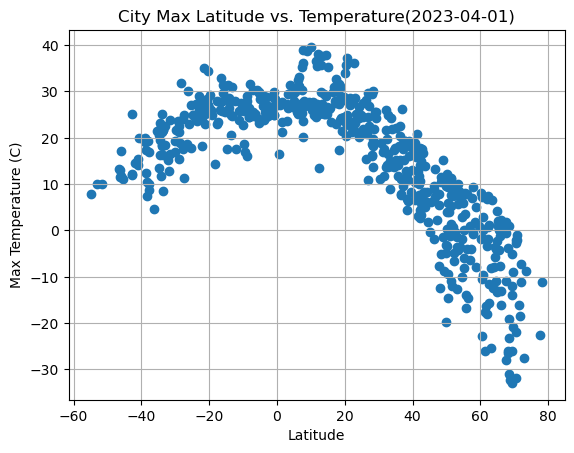

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature(2023-04-01)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

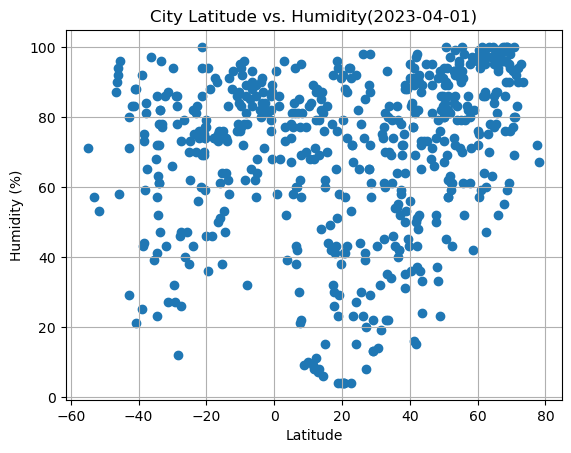

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity(2023-04-01)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

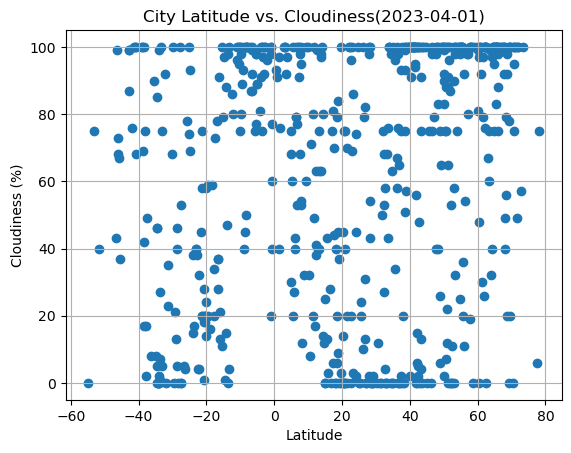

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness(2023-04-01)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

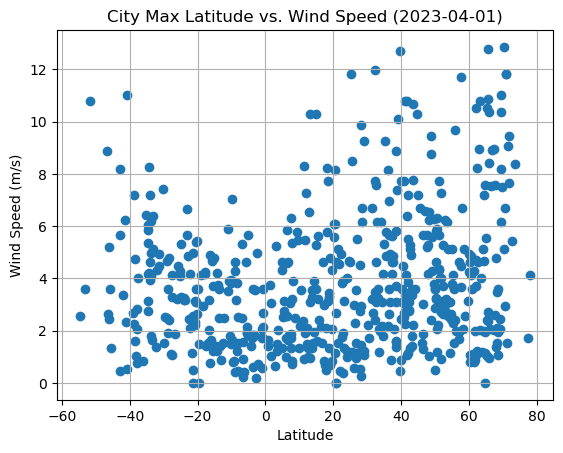

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2023-04-01)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitue')
    plt.ylabel(title)
    print(f"r value is {rvalue}")
    plt.show()


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,esso,55.9333,158.7000,-3.97,98,92,2.39,RU,1680365262
2,narsaq,60.9167,-46.0500,0.12,59,92,0.99,GL,1680365030
6,nikolskoye,59.7035,30.7861,0.94,96,100,3.14,RU,1680365037
7,clyde river,70.4692,-68.5914,-21.87,77,0,5.14,CA,1680365012
8,saint-denis,48.9167,2.3333,15.19,76,75,8.75,FR,1680365263


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,sao felix do xingu,-6.6447,-51.9950,24.65,93,99,1.58,BR,1680365262
3,mount gambier,-37.8333,140.7667,8.66,84,17,0.77,AU,1680365262
4,cape town,-33.9258,18.4232,21.23,72,0,7.20,ZA,1680364724
5,mahebourg,-20.4081,57.7000,26.81,77,18,5.38,MU,1680365263
9,punta arenas,-53.1500,-70.9167,10.06,57,75,3.60,CL,1680365020


###  Temperature vs. Latitude Linear Regression Plot

r value is -0.8807042247419329


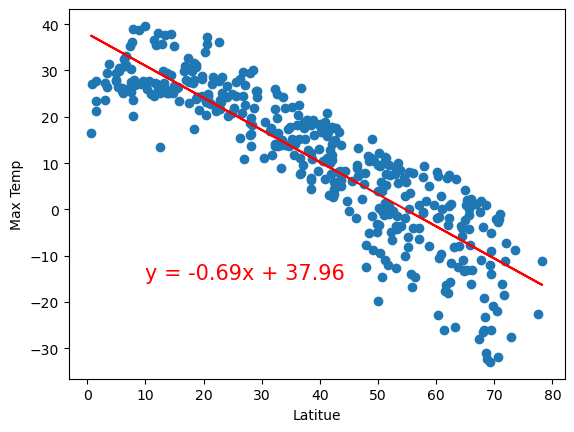

In [ ]:
# Linear regression on Northern Hemisphere
plot_linear_regression (northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Max Temp",(10,-15))



r value is 0.7002200201521497


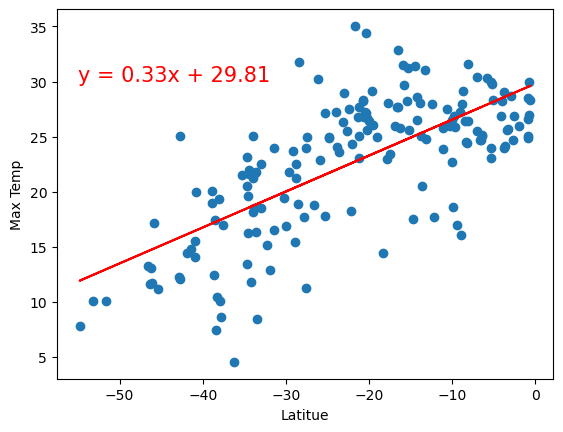

In [ ]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Max Temp",(-55,30))

**Discussion about the linear relationship:** For the Temprature there is a strong corelation. rvalue is closer to -1 on Northern Hemisphere and +1 on Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

r value is 0.4061296293208947


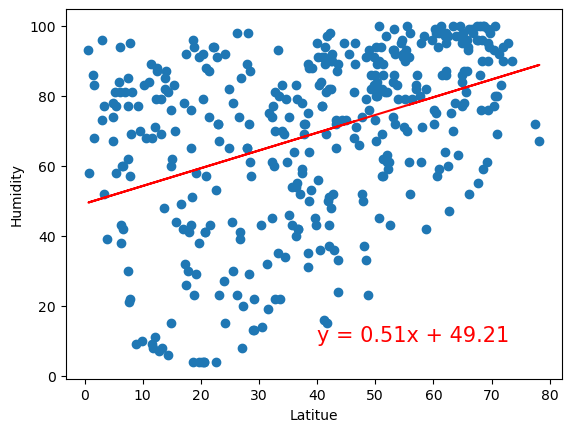

In [ ]:
# Northern Hemisphere
plot_linear_regression (northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Humidity",(40,10))

r value is 0.243856999265706


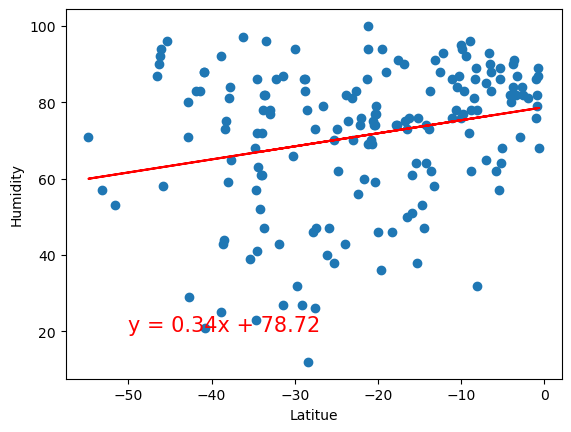

In [ ]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Humidity",(-50,20))

**Discussion about the linear relationship:** For Humidity there is a some corelation. rvalue is in the middle from +1. Both are in positive corelation. Northern r value is better then Southern r value. 

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.24404646724877613


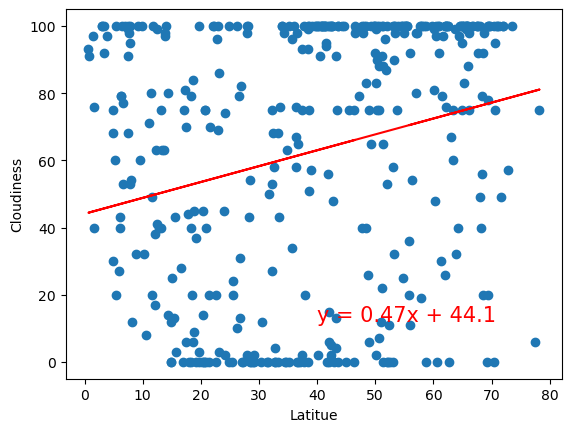

In [ ]:
# Northern Hemisphere
plot_linear_regression (northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Cloudiness",(40,12))


r value is 0.31632240039650006


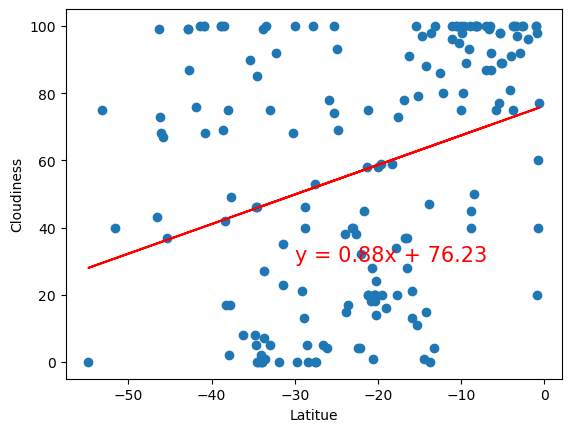

In [ ]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Cloudiness",(-30,30))

**Discussion about the linear relationship:** corelation for cloudiness is minor. Both are on positive 1 value. Southern is little better then Northern.

### Wind Speed vs. Latitude Linear Regression Plot

r value is 0.2308289816825897


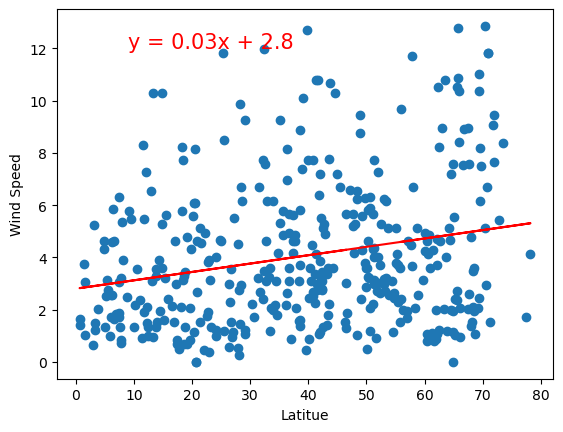

In [ ]:
# Northern Hemisphere
plot_linear_regression (northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Wind Speed",(9,12))


r value is -0.3642570002031768


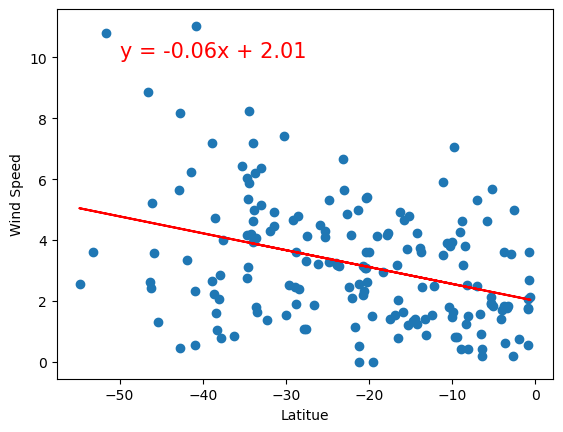

In [ ]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Wind Speed",(-50,10))

**Discussion about the linear relationship:** For wind also minor corelation. Northern is in positive and Southern is in negative. Sothern has better corelation then northern. 
